# **Case: bandeira e religião**

**Importando as bibliotecas necessárias**

In [1]:
import sklearn
import numpy as np
# para ignorar os avisos de mensagens das funções
import warnings
warnings.filterwarnings("ignore")

# pacote para trabalhar com data frame (tabelas)
import pandas as pd
# pacote mais básico para vizualização gráfica
import matplotlib.pyplot as plt
# um dos pacotes para fazer gráficos
import seaborn as sns
# sklearn - pacote análise de dados
# existe grande parte dos métodos mais famosos
from sklearn.model_selection import train_test_split
# função para fazer avaliação dos modelos
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Dense, Dropout

### **Explicação da base de dados**

* **Base de dados**: contém detalhes de várias nações e suas bandeiras.
* **Objetivo**: prever a religião do país a partir de características das bandeiras.
* **Técnica usada**: Redes Neurais perceptron multicamadas (MLP).
* **Variáveis Explicativas**:
  1. <u>name</u>: nome do país em questão;
  2. <u>landmass</u>: massa terrestre
    * 1 = América do Norte;
    * 2 = América do Sul;
    * 3 = Europa;
    * 4 = África;
    * 5 = Ásia;
    * 6 = Oceania;
  3. <u>zone</u>: quadrante geográfico, baseado em Greenwich e no Equador;
    * 1 = NE;
    * 2 = SE;
    * 3 = SW;
    * 4 = NW;
  4. <u>area</u>: em milhares de km quadrados;
  5. <u>population</u>: em torno de milhões;
  6. <u>language</u>: idioma;
    * 1 = inglês;
    * 2 = espanhol;
    * 3 = francês;
    * 4 = alemão;
    * 5 = eslavo;
    * 6 = outro indo-europeu;
    * 7 = chinês;
    * 8 = árabe;
    * 9 = japonês / turco / finlandês / magiar;
    * 10 = outros;
  7. <u>religion</u>: religião;
    * 0 = católica;
    * 1 = outra cristã;
    * 2 = muçulmana;
    * 3 = budista;
    * 4 = hindu;
    * 5 = étnica;
    * 6 = marxista;
    * 7 = outra;
  8. <u>bars</u>: número de barras verticais na bandeira;
  9. <u>stripes</u>: número de listras horizontais na bandeira;
  10. <u>colours</u>: número de cores diferentes na bandeira;
  11. <u>red</u>: se está cor está presente - 0 se ausente e 1 se presente;
  12. <u>green</u>: se está cor está presente - 0 se ausente e 1 se presente;
  13. <u>blue</u>: se está cor está presente - 0 se ausente e 1 se presente;
  14. <u>gold</u>: se está cor está presente - 0 se ausente e 1 se presente;
  15. <u>white</u>: se está cor está presente - 0 se ausente e 1 se presente;
  16. <u>black</u>: se está cor está presente - 0 se ausente e 1 se presente;
  17. <u>orange</u>: se está cor está presente - 0 se ausente e 1 se presente;
  18. <u>mainhue</u>: cor predominante na bandeira (desempates decididos tomando o matiz superior, se falhar, então o matiz mais central, e se falhar o matiz mais à esquerda);
  19. <u>circles</u>: número de círculos na bandeira;
  20. <u>crosses</u>: número de cruzes (verticais);
  21. <u>saltires</u>: número de cruzes diagonaisn;
  22. <u>quarters</u>: número de seções trimestrais;
  23. <u>sunstars</u>: número de símbolos do sol ou estrelas;
  24. <u>crescent</u>: 1 se houver um símbolo de lua crescente, caso contrário 0;
  25. <u>triangle</u>: 1 se houver triângulos presentes, 0 caso contrário;
  26. <u>icon</u>: 1 se houver uma imagem inanimada presente (por exemplo, um barco), caso contrário, 0;
  27. <u>animate</u>: 1 se uma imagem animada (por exemplo, uma águia, uma árvore, uma mão humana) presente, 0 caso contrário;
  28. <u>text</u>: 1 se houver letras ou escritos na bandeira (por exemplo, um lema ou slogan), 0 caso contrário;
  29. <u>topleft</u>: cor no canto superior esquerdo (movendo para a direita para decidir os desempates);
  30. <u>botright</u>: cor no canto inferior esquerdo (movendo para a esquerda para decidir quebras de empate).

[Base de dados flag](https://archive.ics.uci.edu/ml/datasets/Flags)

**Importando alguns pacotes**

Estes pacotes são necessários para treinar os dados com o modelo Rede Neural Múltiplas Camadas (MLP).

In [2]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


### **Baixando os dados**

In [3]:
dataset_path = keras.utils.get_file("flag.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data")
dataset_path

'/root/.keras/datasets/flag.data'

In [4]:
column_names = ['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 
                'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 
                'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 
                'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values = "?",
                          comment = ',',skipinitialspace = True)

dataset = raw_dataset.copy()
dataset.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


### **Estatística básica dos dados e vizualização**

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    object
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

In [6]:
dataset.shape

(194, 30)

Na base de dados temos dados referente a bandeira de 194 países, dados como cor, se tem objetos na imagem, círculos, quadrados, etc. Além disso temos uma variável que compreende a religião de cada um dos países, usamos essa variável como variável resposta, pois desejamos prever a religião de cada país.

**Transformando as variáveis categóricas em numéricas**

Neste passo transformamos as variáveis categóricas em numéricas usando 'LabelEncoder'.

In [7]:
# transformando as variáveis categóricas em numéricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['mainhue'] = le.fit_transform(dataset['mainhue'])
dataset['topleft'] = le.fit_transform(dataset['topleft'])
dataset['botright'] = le.fit_transform(dataset['botright'])

**Visualizando as cinco primeiras linhas**

Para saber se os resultados da transformação ficaram corretos

In [8]:
dataset.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,4,0,0,0,0,1,0,0,1,0,0,0,4
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,6,0,0,0,0,1,0,0,0,1,0,5,6
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,4,0,0,0,0,1,1,0,0,0,0,3,7
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,6
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,6


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        194 non-null    object
 1   landmass    194 non-null    int64 
 2   zone        194 non-null    int64 
 3   area        194 non-null    int64 
 4   population  194 non-null    int64 
 5   language    194 non-null    int64 
 6   religion    194 non-null    int64 
 7   bars        194 non-null    int64 
 8   stripes     194 non-null    int64 
 9   colours     194 non-null    int64 
 10  red         194 non-null    int64 
 11  green       194 non-null    int64 
 12  blue        194 non-null    int64 
 13  gold        194 non-null    int64 
 14  white       194 non-null    int64 
 15  black       194 non-null    int64 
 16  orange      194 non-null    int64 
 17  mainhue     194 non-null    int64 
 18  circles     194 non-null    int64 
 19  crosses     194 non-null    int64 
 20  saltires  

Tudo correto, as variáveis ficam todos numéricas com as transformações.

**Explorando os dados**

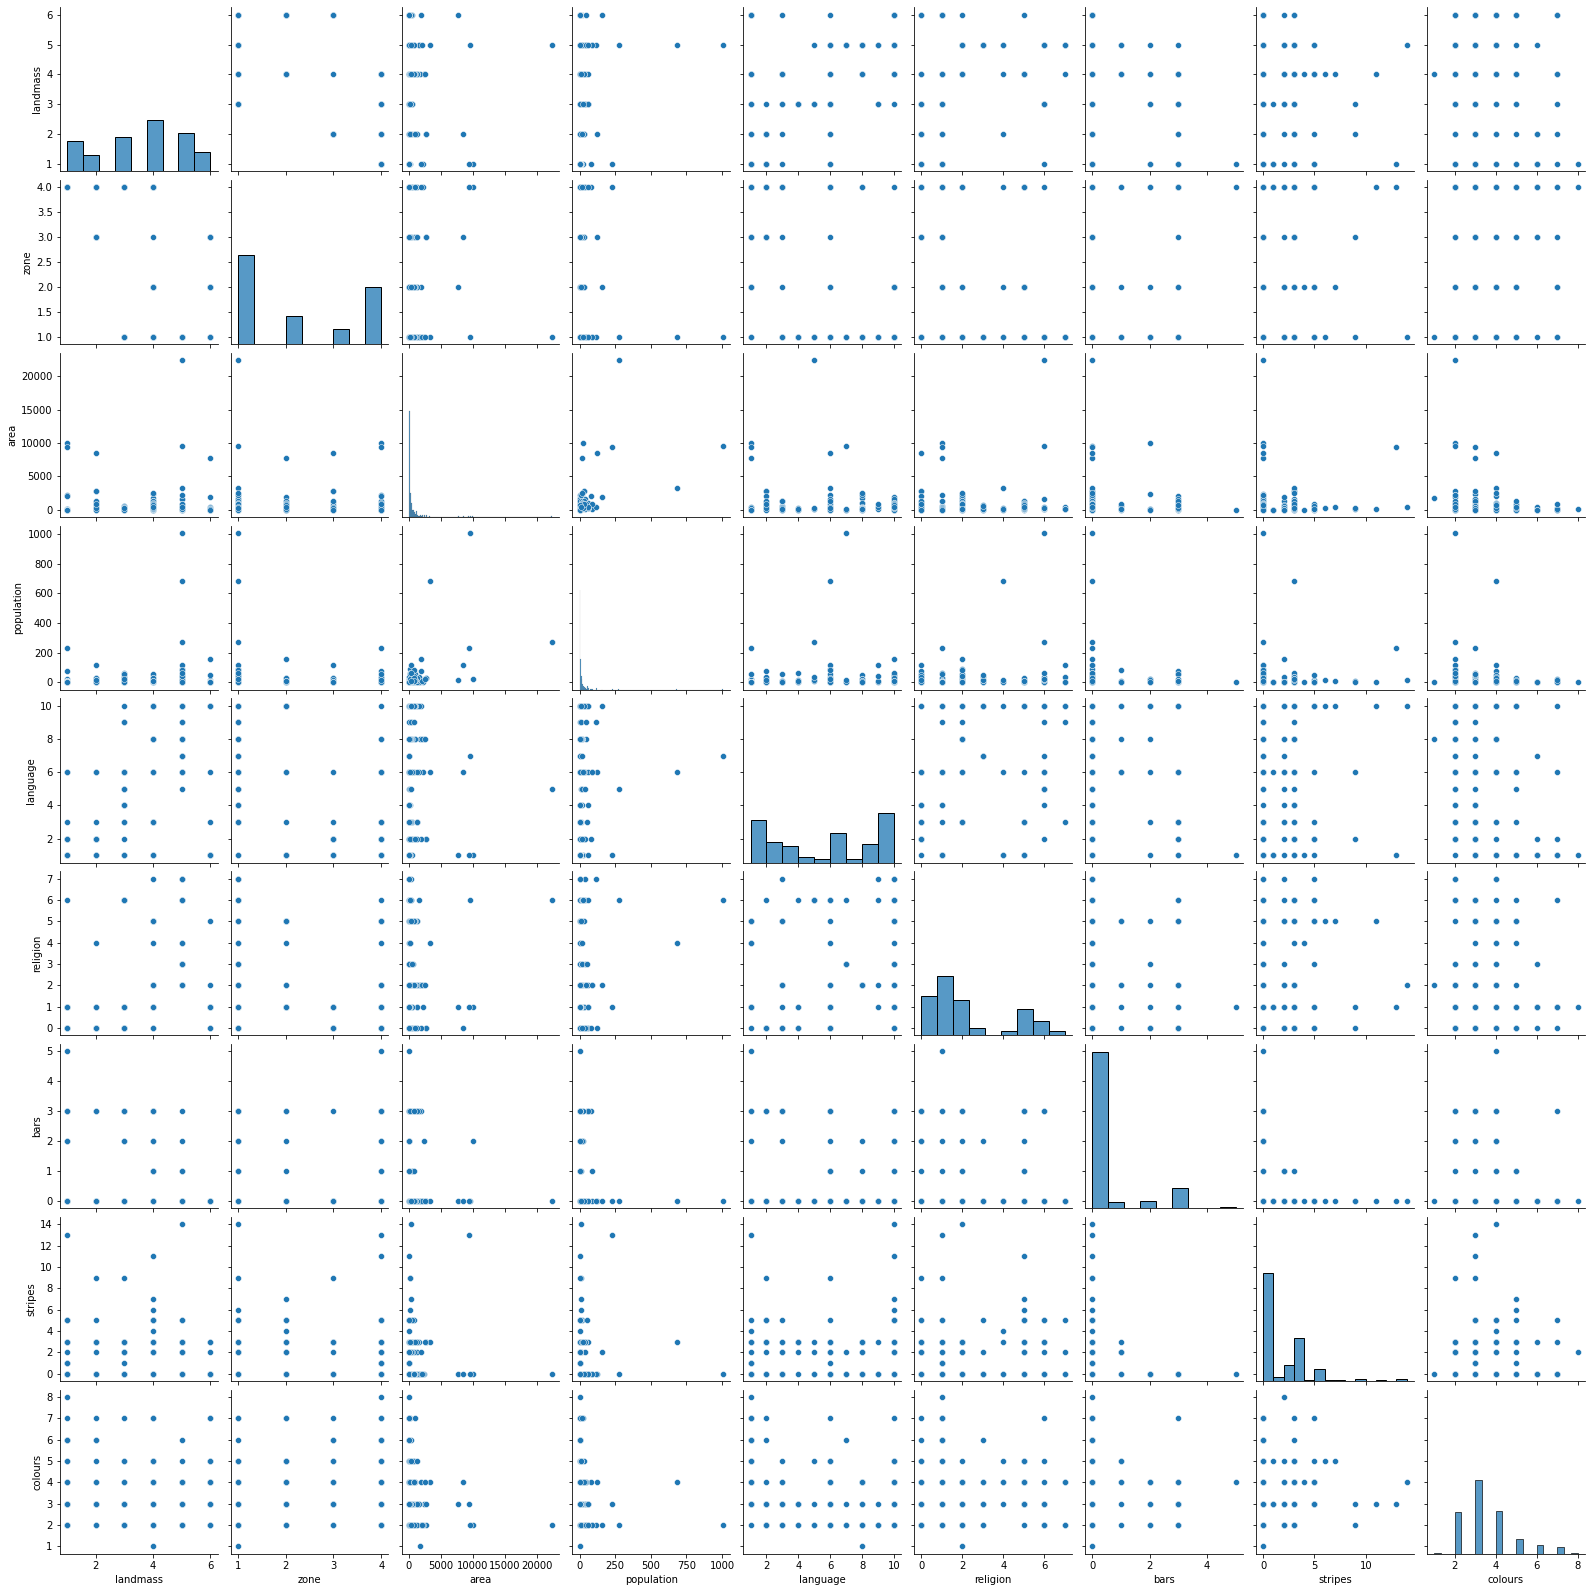

In [10]:
sns.pairplot(dataset.iloc[:, 0:10]) # .drop(['religion'], axis = 1) # diag_kind = "kde"
plt.show()

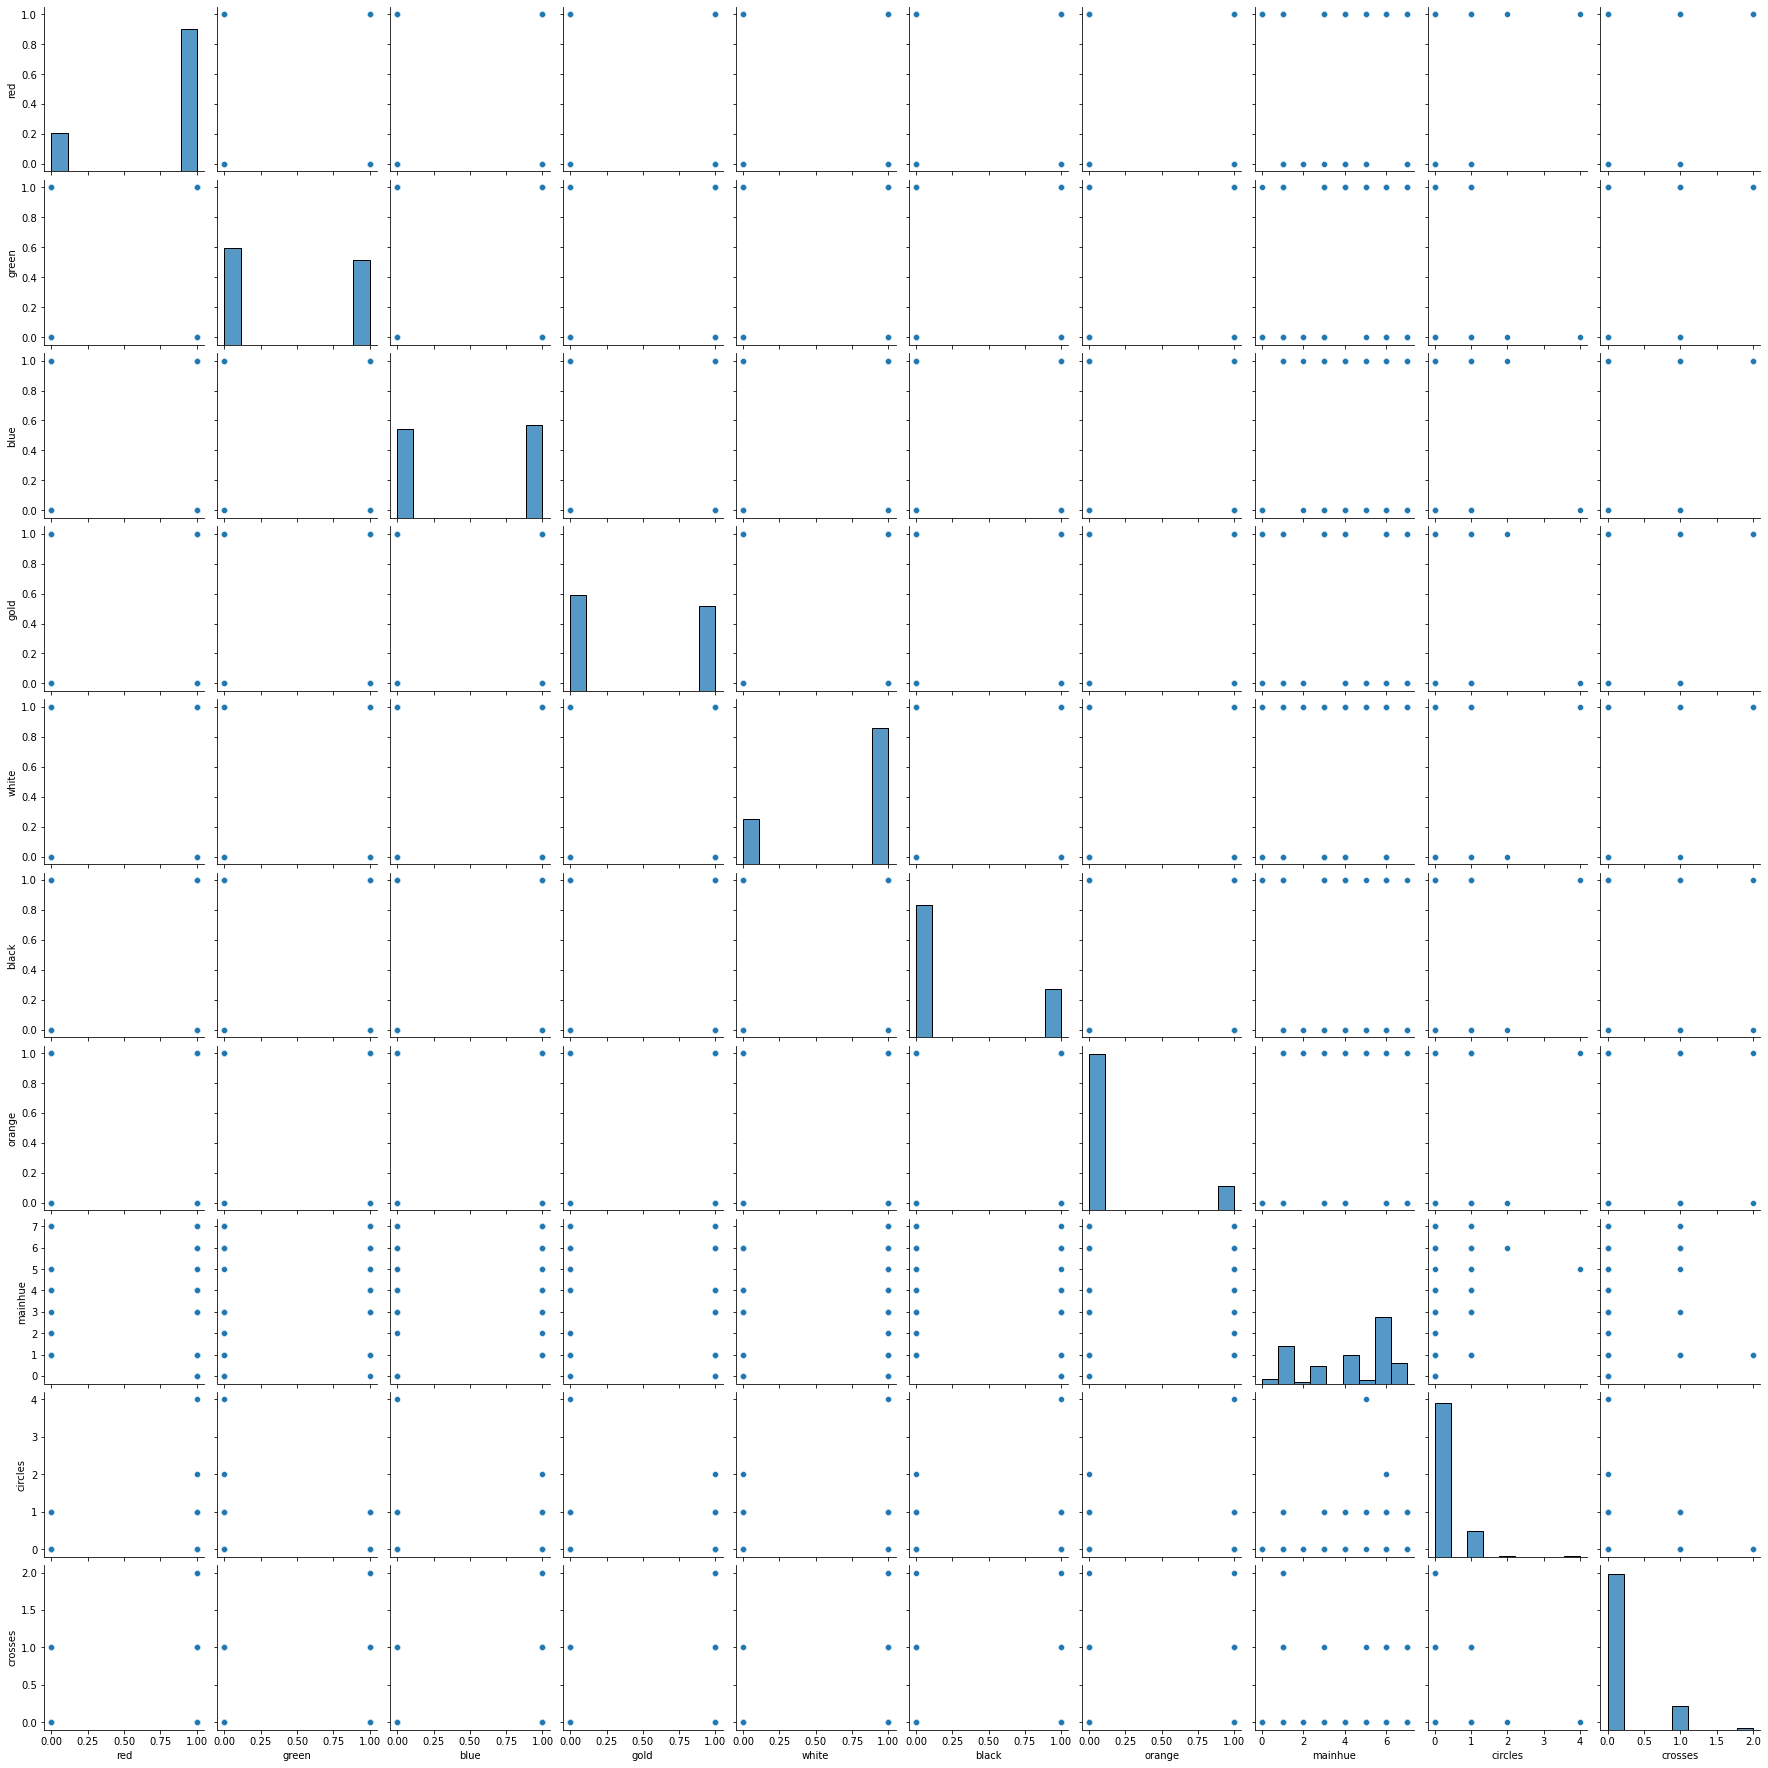

In [11]:
sns.pairplot(dataset.iloc[:, 10:20])
plt.show()

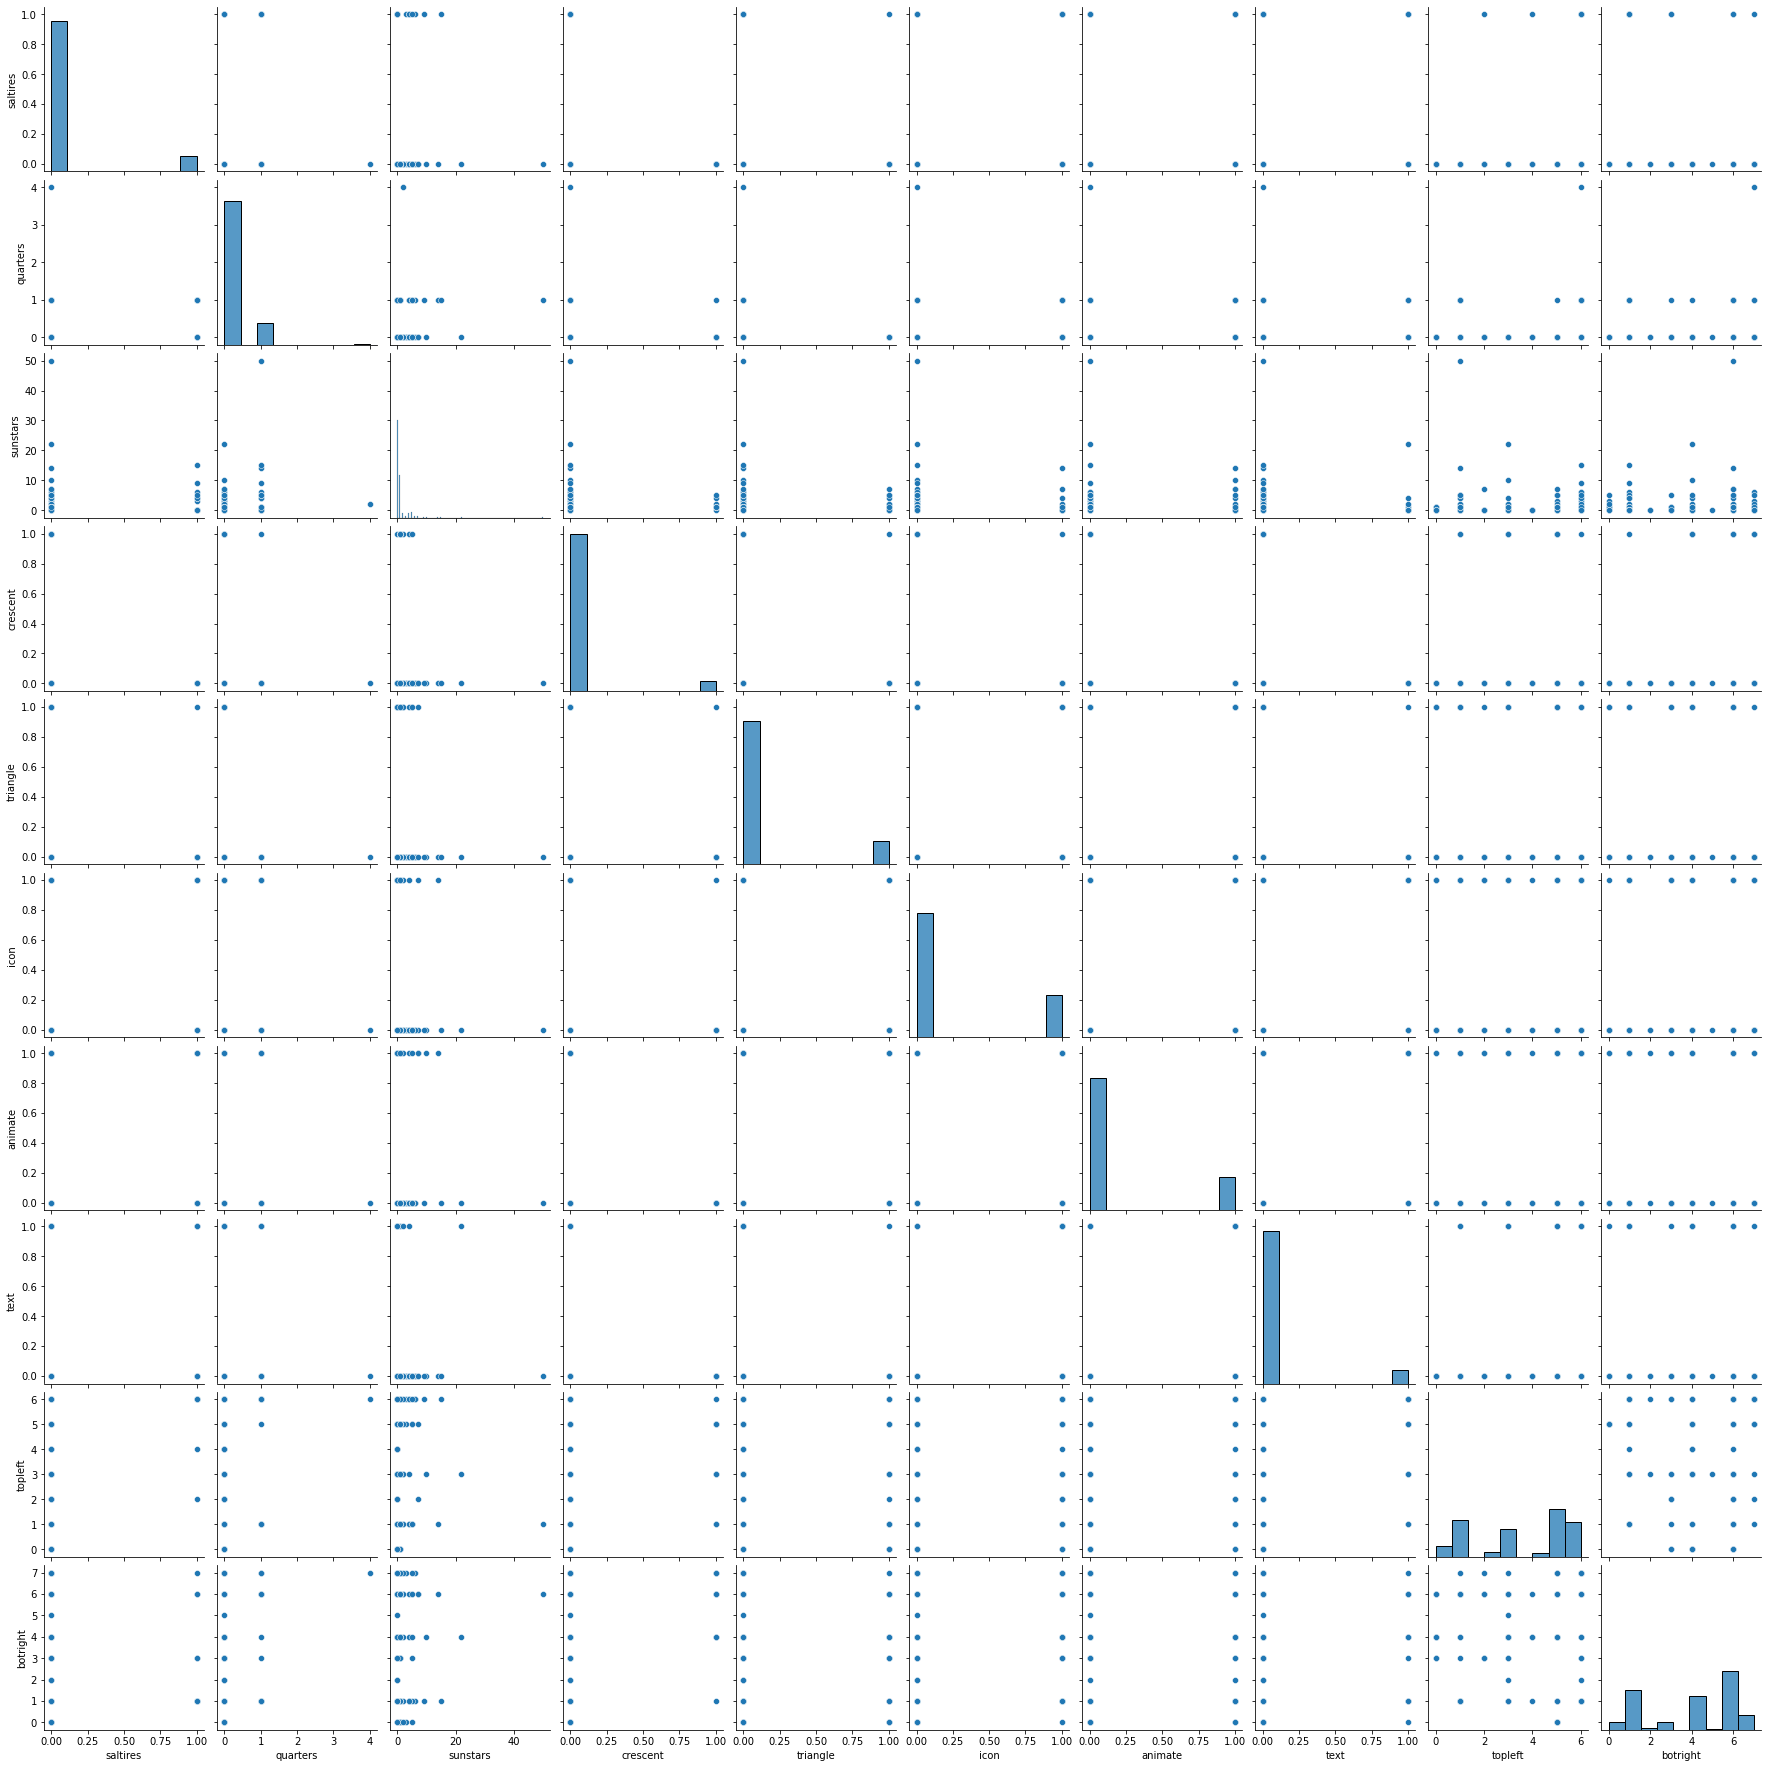

In [12]:
sns.pairplot(dataset.iloc[:, 20:30])
plt.show()

Pelos gráficos verificamos que não há aprentemente cotrrelação entre as variáveis da base de dados de bandeiras.

**Estatísticas Básicas**

Agora apresentamos as estatísticas básicas das variáveis.

In [13]:
# estatísticas básicas
dataset.drop(['religion'], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
landmass,194.0,3.572165,1.553018,1.0,3.0,4.0,5.00,6.0
zone,194.0,2.211340,1.308274,1.0,1.0,2.0,4.00,4.0
area,194.0,700.046392,2170.927932,0.0,9.0,111.0,471.25,22402.0
population,194.0,23.268041,91.934085,0.0,0.0,4.0,14.00,1008.0
language,194.0,5.340206,3.496517,1.0,2.0,6.0,9.00,10.0
bars,194.0,0.453608,1.038339,0.0,0.0,0.0,0.00,5.0
stripes,194.0,1.551546,2.328005,0.0,0.0,0.0,3.00,14.0
colours,194.0,3.463918,1.300154,1.0,3.0,3.0,4.00,8.0
red,194.0,0.788660,0.409315,0.0,1.0,1.0,1.00,1.0
green,194.0,0.469072,0.500334,0.0,0.0,0.0,1.00,1.0


**correlação entre as variáveis**

In [14]:
corr = dataset.corr(method = 'spearman')
corr.style.background_gradient(cmap = 'coolwarm')

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
landmass,1.000000,-0.544783,0.094226,0.085714,0.466591,0.433044,-0.120605,-0.072572,0.021312,0.083602,0.029916,-0.165574,-0.087679,0.011859,-0.046213,0.038035,-0.027488,0.060509,-0.045667,0.012136,0.055848,0.228453,0.182904,-0.013428,0.040628,-0.095356,-0.092331,0.083547,-0.074139
zone,-0.544783,1.000000,-0.159736,-0.271347,-0.590769,-0.357737,0.057227,-0.019913,0.150285,-0.031976,0.089377,0.201596,0.175484,-0.046983,0.039855,0.058495,-0.102791,-0.015786,0.109000,0.204355,0.145403,0.017750,-0.165492,0.070574,-0.044841,0.111416,0.029121,0.008872,-0.055637
area,0.094226,-0.159736,1.000000,0.785010,0.301753,0.246214,0.113357,0.158093,-0.258964,-0.032554,0.044571,-0.209922,-0.123449,-0.159023,-0.091994,-0.102677,0.092452,-0.013170,-0.209962,-0.229201,-0.171901,0.050035,0.089193,-0.098259,-0.155916,-0.185039,-0.076161,-0.166374,0.025302
population,0.085714,-0.271347,0.785010,1.000000,0.289284,0.252643,0.082481,0.166448,-0.247684,0.043046,-0.026435,-0.205804,-0.154313,-0.120991,-0.098927,-0.063901,0.142204,0.009786,-0.188833,-0.176738,-0.152321,0.031902,0.065508,-0.170096,-0.135182,-0.169005,-0.068291,-0.169721,0.110168
language,0.466591,-0.590769,0.301753,0.289284,1.000000,0.458068,0.022281,0.114180,-0.166658,-0.009847,-0.009087,-0.265304,-0.196343,-0.067492,0.077150,-0.078354,0.127373,0.045468,-0.226721,-0.329830,-0.255555,-0.001946,0.189199,-0.081441,0.011082,-0.159920,-0.100604,-0.127590,0.068834
religion,0.433044,-0.357737,0.246214,0.252643,0.458068,1.000000,-0.083485,0.061937,0.037046,0.107444,0.196590,-0.229090,-0.019659,-0.135647,0.075924,-0.027829,0.111262,0.108226,-0.206613,-0.105509,-0.107634,0.120903,0.140927,0.063229,0.053844,0.013534,-0.022633,0.047883,-0.027787
bars,-0.120605,0.057227,0.113357,0.082481,0.022281,-0.083485,1.000000,-0.322864,-0.032124,0.006736,0.143133,-0.171357,0.022042,-0.202653,0.005122,0.051863,-0.033372,-0.150530,-0.152588,-0.149283,-0.183568,-0.180082,0.048751,-0.146780,-0.024842,0.000343,0.019993,-0.149664,0.092643
stripes,-0.072572,-0.019913,0.158093,0.166448,0.114180,0.061937,-0.322864,1.000000,0.107595,0.017084,-0.029186,0.079818,-0.041724,0.094486,0.174604,-0.096347,0.047175,-0.083684,-0.267800,-0.232982,-0.066518,0.010477,-0.113761,0.004890,-0.105171,-0.185809,-0.117082,-0.214651,-0.166813
colours,0.021312,0.150285,-0.258964,-0.247684,-0.166658,0.037046,-0.032124,0.107595,1.000000,0.327459,0.442603,0.248043,0.490008,0.184930,0.432472,0.385097,-0.208116,0.200631,0.125999,0.308626,0.199404,0.081471,-0.196283,0.239007,0.423652,0.484680,0.318176,0.024540,-0.177025
red,0.083602,-0.031976,-0.032554,0.043046,-0.009847,0.107444,0.006736,0.017084,0.327459,1.000000,0.031169,-0.204010,0.081769,-0.033483,0.142230,-0.055783,0.207430,0.111793,0.099766,0.122031,0.129856,0.065483,-0.091458,0.025760,0.097513,0.133648,0.017507,0.235018,0.333283


Com a matriz de correlação, confirmamos que não há correlação forte entre as variáveis da base de dados.

### **Arrumando os dados**

Removendo os outliers substituindo valores pelo mediana de cada uma das variáveis onde há outliers.

Utilizaremos os gráficos boxplot para verificar os outliers.

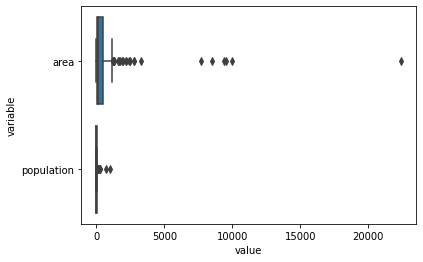

In [15]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['area', 'population']].melt())
plt.show()

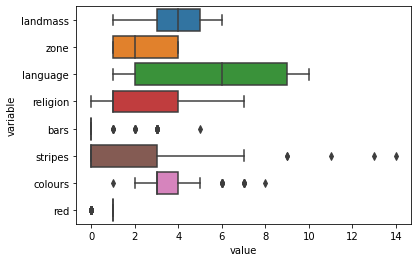

In [16]:
sns.boxplot(x = 'value', y = 'variable', data = dataset.iloc[:, 1:11].drop(['area', 'population'], axis = 1).melt())
plt.show()

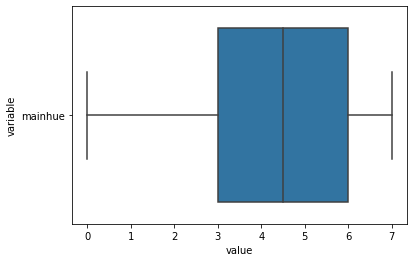

In [17]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['mainhue']].melt())
plt.show()

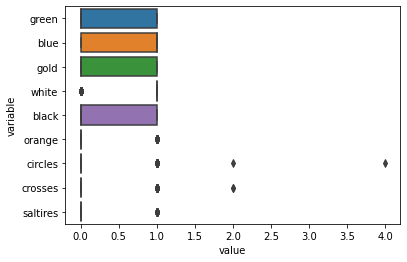

In [18]:
sns.boxplot(x = 'value', y = 'variable', data = dataset.iloc[:, 11:21].drop(['mainhue'], axis = 1).melt())
plt.show()

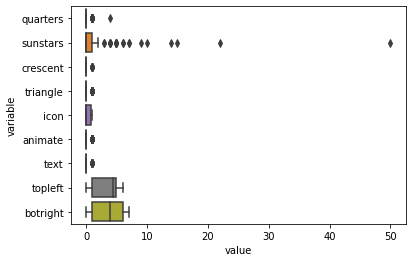

In [19]:
sns.boxplot(x = 'value', y = 'variable', data = dataset.iloc[:, 21:31].melt())
plt.show()

Verificamos pelos gráficos boxplot que há outliers em várias das variáveis.

Utilizamos o seguinte código para remover os outliers, onde removemos os valores abaixo de $Q1 - 1.5 IQR$ e acima de $Q3 + 1.5 IQR$, para cada uma das variáveis.

In [20]:
for i in range(0, 29):
  name_column = dataset.drop(['name'], axis = 1).columns[i]
  Q = dataset.drop(['name'], axis = 1).describe().unstack()
  Q1 = Q[name_column, '25%']
  Q3 = Q[name_column, '75%']
  IQR = Q3 - Q1
  df_extra = np.array(dataset[name_column].values.tolist())
  median = dataset.drop(['name'], axis = 1).iloc[:, i]
  dataset[name_column] = np.where(df_extra < Q1 - 1.5 * IQR, int(median.median()), df_extra).tolist()
  dataset[name_column] = np.where(df_extra > Q3 + 1.5 * IQR, int(median.median()), df_extra).tolist()

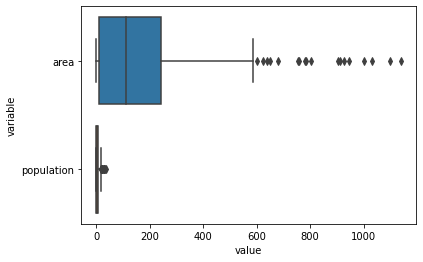

In [21]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['area', 'population']].melt())
plt.show()

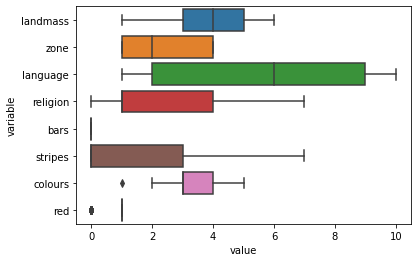

In [22]:
sns.boxplot(x = 'value', y = 'variable', data = dataset.iloc[:, 1:11].drop(['area', 'population'], axis = 1).melt())
plt.show()

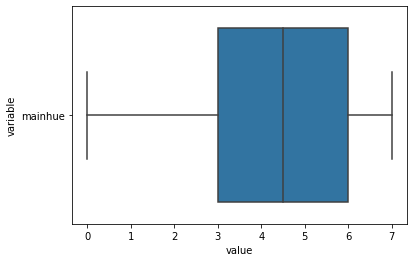

In [23]:
sns.boxplot(x = 'value', y = 'variable', data = dataset[['mainhue']].melt())
plt.show()

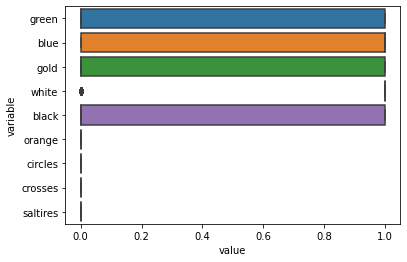

In [24]:
sns.boxplot(x = 'value', y = 'variable', data = dataset.iloc[:, 11:21].drop(['mainhue'], axis = 1).melt())
plt.show()

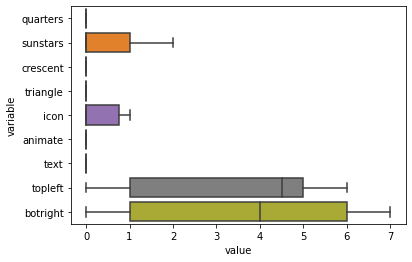

In [25]:
sns.boxplot(x = 'value', y = 'variable', data = dataset.iloc[:, 21:31].melt())
plt.show()

Obtemos que a maioria dos outliers foram removidos.

**Selecionando as variáveis explicativas (features) mais significativas do modelo**

Usamos o teste F para selecionar 80% das variáveis mais significativas da base de dados.

[Fonte](https://minerandodados.com.br/feature-selection-bala-de-prata/)

In [26]:
X = dataset.drop(['name', 'religion'], axis = 1)
y = dataset['religion']

In [27]:
X.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,5,1,648,16,10,0,3,5,1,1,0,1,1,1,0,4,0,0,0,0,1,0,0,1,0,0,0,4
1,3,1,29,3,6,0,0,3,1,0,0,1,0,1,0,6,0,0,0,0,1,0,0,0,0,0,5,6
2,4,1,111,20,8,0,0,3,1,1,0,0,1,0,0,4,0,0,0,0,1,0,0,0,0,0,3,7
3,6,3,0,0,1,0,0,5,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,6
4,3,1,0,0,6,0,0,3,1,0,1,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,6


Aplicando o Teste F para escolher os 80% das variáveis mais significativas da base de dados.

In [28]:
# Aplicando o F-test
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.f_classif, percentile = 80)

X_treino_fs_80 = fs.fit_transform(X, y)

X_80 = pd.DataFrame(X_treino_fs_80, columns = ['landmass', 'zone', 'area', 'population',
                                               'language', 'stripes', 'colours', 'red',
                                               'green', 'blue', 'gold', 'white', 'black',
                                               'mainhue', 'sunstars', 'icon', 'topleft', 'botright'])
X_80.head()

,landmass,zone,area,population,language,stripes,colours,red,green,blue,gold,white,black,mainhue,sunstars,icon,topleft,botright
0,5,1,648,16,10,3,5,1,1,0,1,1,1,4,1,1,0,4
1,3,1,29,3,6,0,3,1,0,0,1,0,1,6,1,0,5,6
2,4,1,111,20,8,0,3,1,1,0,0,1,0,4,1,0,3,7
3,6,3,0,0,1,0,5,1,0,1,1,1,0,1,0,1,1,6
4,3,1,0,0,6,0,3,1,0,1,1,0,0,3,0,0,1,6


**Normalizando os dados**

Nesta etapa, normalizamos os dados tento usando os dados completos ($X$) como usando somente 80% das variáveis mais significativas ($X_{80}$).

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_norm = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_80_norm = pd.DataFrame(scaler.fit_transform(X_80), columns = X_80.columns)

**Dados de treinamento e teste**

Agora separamos os dados em dados de treinamento e teste.

In [30]:
# 80% da variáveis mais significativas
X_80_train_norm, X_80_test_norm, y_train, y_test = train_test_split(X_80_norm, y, test_size = 0.20, random_state = 376)

print('Tamanho dos dados - X_80_train_norm: {}, X_80_test_norm: {}, y_train: {}, y_test: {}'.format(X_80_train_norm.shape, X_80_test_norm.shape, y_train.shape, y_test.shape))

Tamanho dos dados - X_80_train_norm: (155, 18), X_80_test_norm: (39, 18), y_train: (155,), y_test: (39,)


In [31]:
# todos os dados
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size = 0.20, random_state = 376)

print('Tamanho dos dados - X_train_norm: {}, X_test_norm: {}, y_train: {}, y_test: {}'.format(X_train_norm.shape, X_test_norm.shape, y_train.shape, y_test.shape))

Tamanho dos dados - X_train_norm: (155, 28), X_test_norm: (39, 28), y_train: (155,), y_test: (39,)


### **Criando modelo e treinando com os dados de treino**

Aplicando o modelo de Redes Neurais perceptron multicamadas (MLP), usando dez camadas escondidas (hidden layer), com função de ativação a função relu e para resolver a otimização usa-se o Gradiente Descendente Estocástico (sgd).

Aplicação do modelo MLP.

In [32]:
# biblioteca para trabalhar com redes neurais
from sklearn.neural_network import MLPClassifier

# solver: resolvedor da otimização
# hidden_layer_sizes: quantidade de neurônios na camada escondida - neste caso vamos ter somente uma camada escondida
#     uma tupla em que cada elemento (número) que colocamos é a quantidade de elementos na camada escondida 
# learning_rate_init: taxa de aprendizagem inicial
# activation: função de ativação para o neurônios
# max_iter: número máximo de iterações
# random_state: semente de geração aleatória de pesos e bias de inicialização
rd_classifier = MLPClassifier(solver = 'sgd', hidden_layer_sizes = (10, ),
                              learning_rate_init = 0.01, activation = 'relu',
                              max_iter = 1500, random_state = 376) # random_state = 376

rd_classifier.fit(X_80_train_norm, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=376, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Predição da probailidade de cada país pertencer a cada classe de religião.

In [33]:
# predict_proba: probabilidade de cada elemento ser daquela classe
y_pred = rd_classifier.predict_proba(X_80_test_norm)
y_pred;

Escolhendo como religião do país a classe com maior probabilidade.

In [34]:
# classe em que o elemento foi predito
classe_pred = np.argmax(y_pred, 1)
classe_pred

array([1, 5, 5, 6, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 5, 1, 2, 2, 2, 1, 0, 5,
       0, 0, 0, 0, 1, 2, 1, 1, 5, 2, 6, 1, 2, 2, 6, 1, 0])

Acurácua da predição do modelo Rede Neurais

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

round(accuracy_score(le.fit_transform(y_test), classe_pred), 4)

0.6154

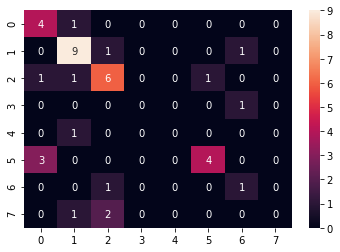



              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.69      0.82      0.75        11
           2       0.60      0.67      0.63         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.80      0.57      0.67         7
           6       0.33      0.50      0.40         2
           7       0.00      0.00      0.00         3

    accuracy                           0.62        39
   macro avg       0.37      0.42      0.38        39
weighted avg       0.56      0.62      0.58        39



In [36]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame((pd.crosstab(y_test, classe_pred,
                               rownames = ['Real'], colnames = ['Predito'])))
cm = confusion_matrix(y_test, classe_pred)
sns.heatmap(cm, annot = True)
plt.show()
print('\n')
print(classification_report(y_test, classe_pred))

Após aplicado o modelo MLP, obntenmos uma acurácia de $62\%$.

### **Obtendo o melhor modelo usando Grid Search e Cross Validation**

Em seguida usamos GridSearch com Cross Validation para tunar os parâmetros do modelo MLP, e obter os melhores parâmetros para os dados sobre bandeira e religião.

Melhores parâmetros:

{'activation': 'tanh', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.001, 'max_iter': 1500, 'random_state': 376, 'solver': 'sgd'}


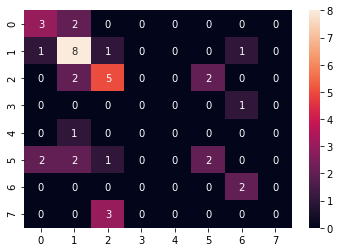

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.53      0.73      0.62        11
           2       0.50      0.56      0.53         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.50      0.29      0.36         7
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         3

    accuracy                           0.51        39
   macro avg       0.32      0.40      0.34        39
weighted avg       0.45      0.51      0.46        39

Tempo de execução: 1.9761029521624247 minutos.


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import time

ini = time.time()
tuned_parameters = [
    [{'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu'],
      'learning_rate_init': [0.001, 0.01, 0.1], 'max_iter': [1500],
      'random_state': [376], 'hidden_layer_sizes': [(10, ), (20, )]
      }]
]

rd_classifier = GridSearchCV(MLPClassifier(), tuned_parameters[0], cv = 5, scoring = 'accuracy')
rd_classifier.fit(X_80_train_norm, y_train)
y_pred = rd_classifier.predict(X_80_test_norm)

print("Melhores parâmetros:\n")
print(rd_classifier.best_params_)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

print(classification_report(y_test, y_pred))

fim = time.time()
print ("Tempo de execução: {} minutos.".format((fim - ini) / 60))

Ajustando os parâmetros do modelo e usando GridSearch, o melhor modelo que obtemos teve uma acurácia de 62%.

### **Outros modelos**

Aplicando outros modelos para saber se obtém melhores resultados. Os modelos usados para comparação foram Regressão Logística, KNN, Árvore de Decisão, Floresta Aleatória e Máquina de Vetor Suporte.

Primeiramente para a base de dados com todas as variáveis. Estas normalizadas.

Modelo: Regressão Logística
Melhores parâmetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Tempo de execução: 0.38496150573094684 minutos.




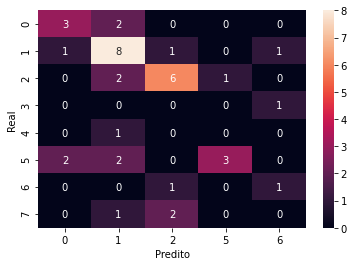



              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.73      0.59        11
           2       0.60      0.67      0.63         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.75      0.43      0.55         7
           6       0.33      0.50      0.40         2
           7       0.00      0.00      0.00         3

    accuracy                           0.54        39
   macro avg       0.34      0.37      0.34        39
weighted avg       0.50      0.54      0.50        39

Modelo: KNN
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Tempo de execução: 0.5180901328722636 minutos.




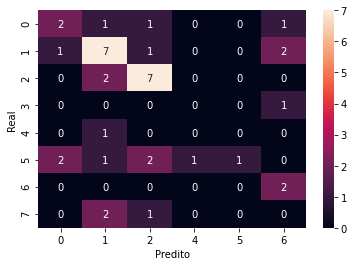



              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.50      0.64      0.56        11
           2       0.58      0.78      0.67         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      0.14      0.25         7
           6       0.33      1.00      0.50         2
           7       0.00      0.00      0.00         3

    accuracy                           0.49        39
   macro avg       0.35      0.37      0.30        39
weighted avg       0.52      0.49      0.43        39

Modelo: Árvore de Decisão
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
Tempo de execução: 1.574299152692159 minutos.




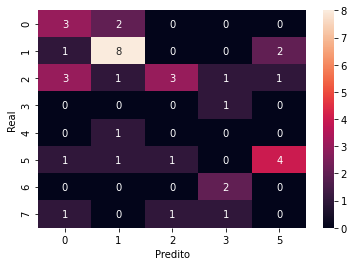



              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       0.62      0.73      0.67        11
           2       0.60      0.33      0.43         9
           3       0.20      1.00      0.33         1
           4       0.00      0.00      0.00         1
           5       0.57      0.57      0.57         7
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3

    accuracy                           0.49        39
   macro avg       0.29      0.40      0.30        39
weighted avg       0.46      0.49      0.45        39

Modelo: Floresta Aleatória
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Tempo de execução: 2.1566182096799213 minutos.




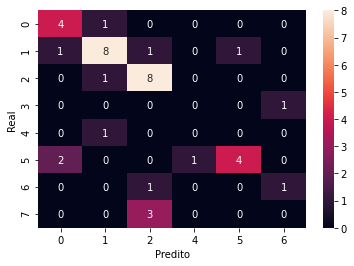



              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.73      0.73      0.73        11
           2       0.62      0.89      0.73         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.80      0.57      0.67         7
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         3

    accuracy                           0.64        39
   macro avg       0.40      0.44      0.41        39
weighted avg       0.59      0.64      0.60        39



,Modelo,Acurácia,Tempo
0,Regressão Logística,0.538462,0.384962
1,KNN,0.487179,0.518090
2,Árvore de Decisão,0.487179,1.574299
3,Floresta Aleatória,0.641026,2.156618


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

ini = time.time()
# df = pd.DataFrame(np.random.rand(4,5),
#                   columns=["Nome", "Acurácia", "Recall",
#                            "Especificidade", "Precisão"])

metodos_names = ['Regressão Logística', 'KNN', 'Árvore de Decisão', 'Floresta Aleatória'] # 'SVM Polinomial', 'SVM', 
df1 = pd.DataFrame(np.random.rand(len(metodos_names), 3), columns = ["Modelo", "Acurácia", "Tempo"])

# Lista de hyperpatametros para tunar.
n_neighbors = list(range(1,30))
p = [1,2]
tuned_parameters = [
    [{ 'C':[0.1, 1, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
      'degree':[1, 2, 3, 4, 5, 6], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
    [{'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['auto', 'scale']},
     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale']}],
    [{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C':  [0.01, 0.1, 1.0, 10, 100],
      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}], # 'max_iter': [1000]}],
    [{'n_neighbors': n_neighbors, 'metric': ['euclidean', 'manhattan', 'minkowski'],
      'p': [1, 2], 'weights': ['uniform', 'distance']}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 50)), 'splitter': ['best', 'random'],
      'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [1, 5, 10],
      'min_samples_leaf': [1, 5, 10]}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': [5, 20, 50],
      'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 5]}]
       # 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 5, 10], 'n_estimators': [10, 100, 1000]
]

c = 2
for cl in [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]: # SVC
    classifier = GridSearchCV(cl(), tuned_parameters[c], cv = 5, scoring = 'accuracy')
    classifier.fit(X_train_norm, y_train)
    y_pred = classifier.predict(X_test_norm)

    fim = time.time()

    print("Modelo: {}".format(metodos_names[c-2]))
    print("Melhores parâmetros: {}".format(classifier.best_params_))
    print("Tempo de execução: {} minutos.".format((fim - ini) / 60))

    print('\n')
    cm = pd.DataFrame((pd.crosstab(y_test, y_pred,
                                   rownames = ['Real'], colnames = ['Predito'])))
    sns.heatmap(cm, annot = True)
    plt.show()

    print('\n')
    print(classification_report(y_test, y_pred))

    df1.iloc[c-2, 0] = metodos_names[c-2]
    df1.iloc[c-2, 1] = accuracy_score(y_test.astype('int'), y_pred.astype('int'))
    df1.iloc[c-2, 2] = (fim - ini) / 60

    c = c + 1
    
df1

E para a base usando 80% das variáveis mais significatvas, tambpem com os dados normalizados.

Modelo: Regressão Logística
Melhores parâmetros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Tempo de execução: 0.372930367787679 minutos.




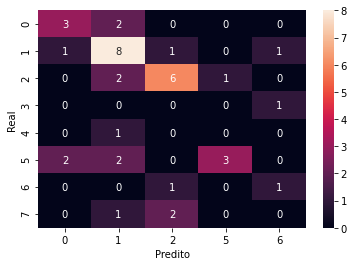



              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.73      0.59        11
           2       0.60      0.67      0.63         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.75      0.43      0.55         7
           6       0.33      0.50      0.40         2
           7       0.00      0.00      0.00         3

    accuracy                           0.54        39
   macro avg       0.34      0.37      0.34        39
weighted avg       0.50      0.54      0.50        39

Modelo: KNN
Melhores parâmetros: {'metric': 'manhattan', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Tempo de execução: 0.5014991243680318 minutos.




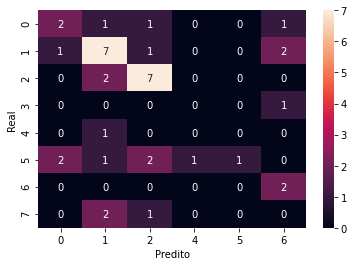



              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.50      0.64      0.56        11
           2       0.58      0.78      0.67         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      0.14      0.25         7
           6       0.33      1.00      0.50         2
           7       0.00      0.00      0.00         3

    accuracy                           0.49        39
   macro avg       0.35      0.37      0.30        39
weighted avg       0.52      0.49      0.43        39

Modelo: Árvore de Decisão
Melhores parâmetros: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'best'}
Tempo de execução: 1.5566682895024617 minutos.




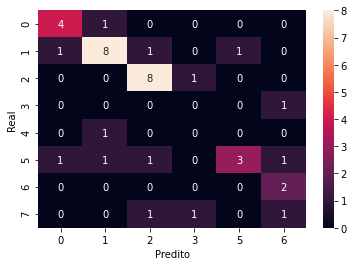



              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.73      0.73      0.73        11
           2       0.73      0.89      0.80         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.75      0.43      0.55         7
           6       0.40      1.00      0.57         2
           7       0.00      0.00      0.00         3

    accuracy                           0.64        39
   macro avg       0.41      0.48      0.42        39
weighted avg       0.61      0.64      0.61        39

Modelo: Floresta Aleatória
Melhores parâmetros: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
Tempo de execução: 2.1397165854771933 minutos.




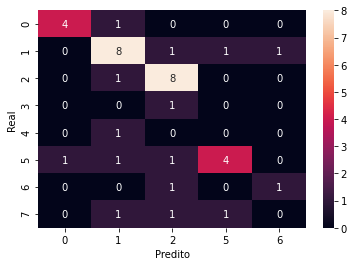



              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.62      0.73      0.67        11
           2       0.62      0.89      0.73         9
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.67      0.57      0.62         7
           6       0.50      0.50      0.50         2
           7       0.00      0.00      0.00         3

    accuracy                           0.64        39
   macro avg       0.40      0.44      0.41        39
weighted avg       0.56      0.64      0.59        39



,Modelo,Acurácia,Tempo
0,Regressão Logística,0.538462,0.372930
1,KNN,0.487179,0.501499
2,Árvore de Decisão,0.641026,1.556668
3,Floresta Aleatória,0.641026,2.139717


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

ini = time.time()
# df = pd.DataFrame(np.random.rand(4,5),
#                   columns=["Nome", "Acurácia", "Recall",
#                            "Especificidade", "Precisão"])

metodos_names = ['Regressão Logística', 'KNN', 'Árvore de Decisão', 'Floresta Aleatória'] # 'SVM Polinomial', 'SVM', 
df2 = pd.DataFrame(np.random.rand(len(metodos_names), 3), columns = ["Modelo", "Acurácia", "Tempo"])

# Lista de hyperpatametros para tunar.
n_neighbors = list(range(1,30))
p = [1,2]
tuned_parameters = [
    [{ 'C':[0.1, 1, 100, 1000], 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
      'degree':[1, 2, 3, 4, 5, 6], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}],
    [{'kernel': ['poly'], 'degree': [1, 2, 3, 4, 5, 6], 'gamma': ['auto', 'scale']},
     {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale']}],
    [{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C':  [0.01, 0.1, 1.0, 10, 100],
      'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}], # 'max_iter': [1000]}],
    [{'n_neighbors': n_neighbors, 'metric': ['euclidean', 'manhattan', 'minkowski'],
      'p': [1, 2], 'weights': ['uniform', 'distance']}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': list(range(1, 50)), 'splitter': ['best', 'random'],
      'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [1, 5, 10],
      'min_samples_leaf': [1, 5, 10]}],
    [{'criterion': ['gini', 'entropy'], 'max_depth': [5, 20, 50],
      'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 4], 'min_samples_leaf': [1, 5]}]
       # 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 5, 10], 'n_estimators': [10, 100, 1000]
]

c = 2
for cl in [LogisticRegression, KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]: # SVC
    classifier = GridSearchCV(cl(), tuned_parameters[c], cv = 5, scoring = 'accuracy')
    classifier.fit(X_80_train_norm, y_train)
    y_pred = classifier.predict(X_80_test_norm)

    fim = time.time()

    print("Modelo: {}".format(metodos_names[c-2]))
    print("Melhores parâmetros: {}".format(classifier.best_params_))
    print ("Tempo de execução: {} minutos.".format((fim - ini) / 60))

    print('\n')
    cm = pd.DataFrame((pd.crosstab(y_test, y_pred,
                                   rownames = ['Real'], colnames = ['Predito'])))
    sns.heatmap(cm, annot = True)
    plt.show()

    print('\n')
    print(classification_report(y_test, y_pred))

    df2.iloc[c-2, 0] = metodos_names[c-2]
    df2.iloc[c-2, 1] = accuracy_score(y_test.astype('int'), y_pred.astype('int'))
    df2.iloc[c-2, 2] = (fim - ini) / 60

    c = c + 1
    
df2

### **Conclusão**

* Com a aplicação de outros modelos, conluímos que o melhor modelo para prever a religião usando carascterísticas da bandeira é o modelo de Floresta Aletória, que obteve uma acurácia de 64%. O que representa 2% a mais que a Redes Neurais perceptron multicamadas (MLP).

* Os modelos foram melhores usando 80% das variáveis mais significativas, obtidas usando o teste estatístico F, removendo outliers e normalizando os dados.

* Normalizar é o que mais fez diferença nos resultados do modelo de Redes Neurais.